# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
!pip install palmerpenguins
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from palmerpenguins import load_penguins
df = load_penguins()
df.head()

In [2]:
df = df.dropna()
cat_features = ["species", "island", "sex"]
df = pd.get_dummies(df,columns=cat_features,drop_first=True)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False
5,39.3,20.6,190.0,3650.0,2007,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,2009,True,False,True,False,True
340,43.5,18.1,202.0,3400.0,2009,True,False,True,False,False
341,49.6,18.2,193.0,3775.0,2009,True,False,True,False,True
342,50.8,19.0,210.0,4100.0,2009,True,False,True,False,True


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Your best multiple linear regression model from before
* Two kNN models (for different values of K)
* A decision tree model

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

In [16]:
X = pd.concat([df["bill_length_mm"], df["bill_length_mm"]**2], axis=1)
lr = LinearRegression()
lr.fit(X_train, y_train)
train_mse_lr = mean_squared_error(y_train, lr.predict(X_train))
test_mse_lr = mean_squared_error(y_test, lr.predict(X_test))

In [17]:
X = df.drop(columns=["bill_depth_mm"],axis=1)
y = df["bill_depth_mm"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn1 = KNeighborsRegressor(n_neighbors=5)
knn1.fit(X_train, y_train)
train_mse_knn1 = mean_squared_error(y_train, knn1.predict(X_train))
test_mse_knn1 = mean_squared_error(y_test, knn1.predict(X_test))

knn2 = KNeighborsRegressor(n_neighbors=20)
knn2.fit(X_train, y_train)
train_mse_knn2 = mean_squared_error(y_train, knn2.predict(X_train))
test_mse_knn2 = mean_squared_error(y_test, knn2.predict(X_test))

tree = DecisionTreeRegressor(max_depth=2)
tree.fit(X_train, y_train)
train_mse_tree = mean_squared_error(y_train, tree.predict(X_train))
test_mse_tree = mean_squared_error(y_test, tree.predict(X_test))

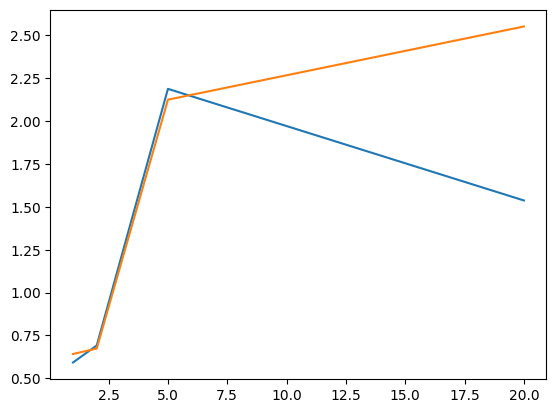

In [18]:
flexibility = [1, 2, 5, 20]
train_mses = [train_mse_lr, train_mse_tree, train_mse_knn2, train_mse_knn1]
test_mses = [test_mse_lr, test_mse_tree, test_mse_knn2, test_mse_knn1]
plt.plot(flexibility, train_mses)
plt.plot(flexibility, test_mses)

In [19]:
test_mse_lr, test_mse_knn1, test_mse_knn2, test_mse_tree

(0.6421284364970563,
 2.5512417910447756,
 2.1245388059701478,
 0.6740066210568544)

Best multiple linear regression model from before was best.